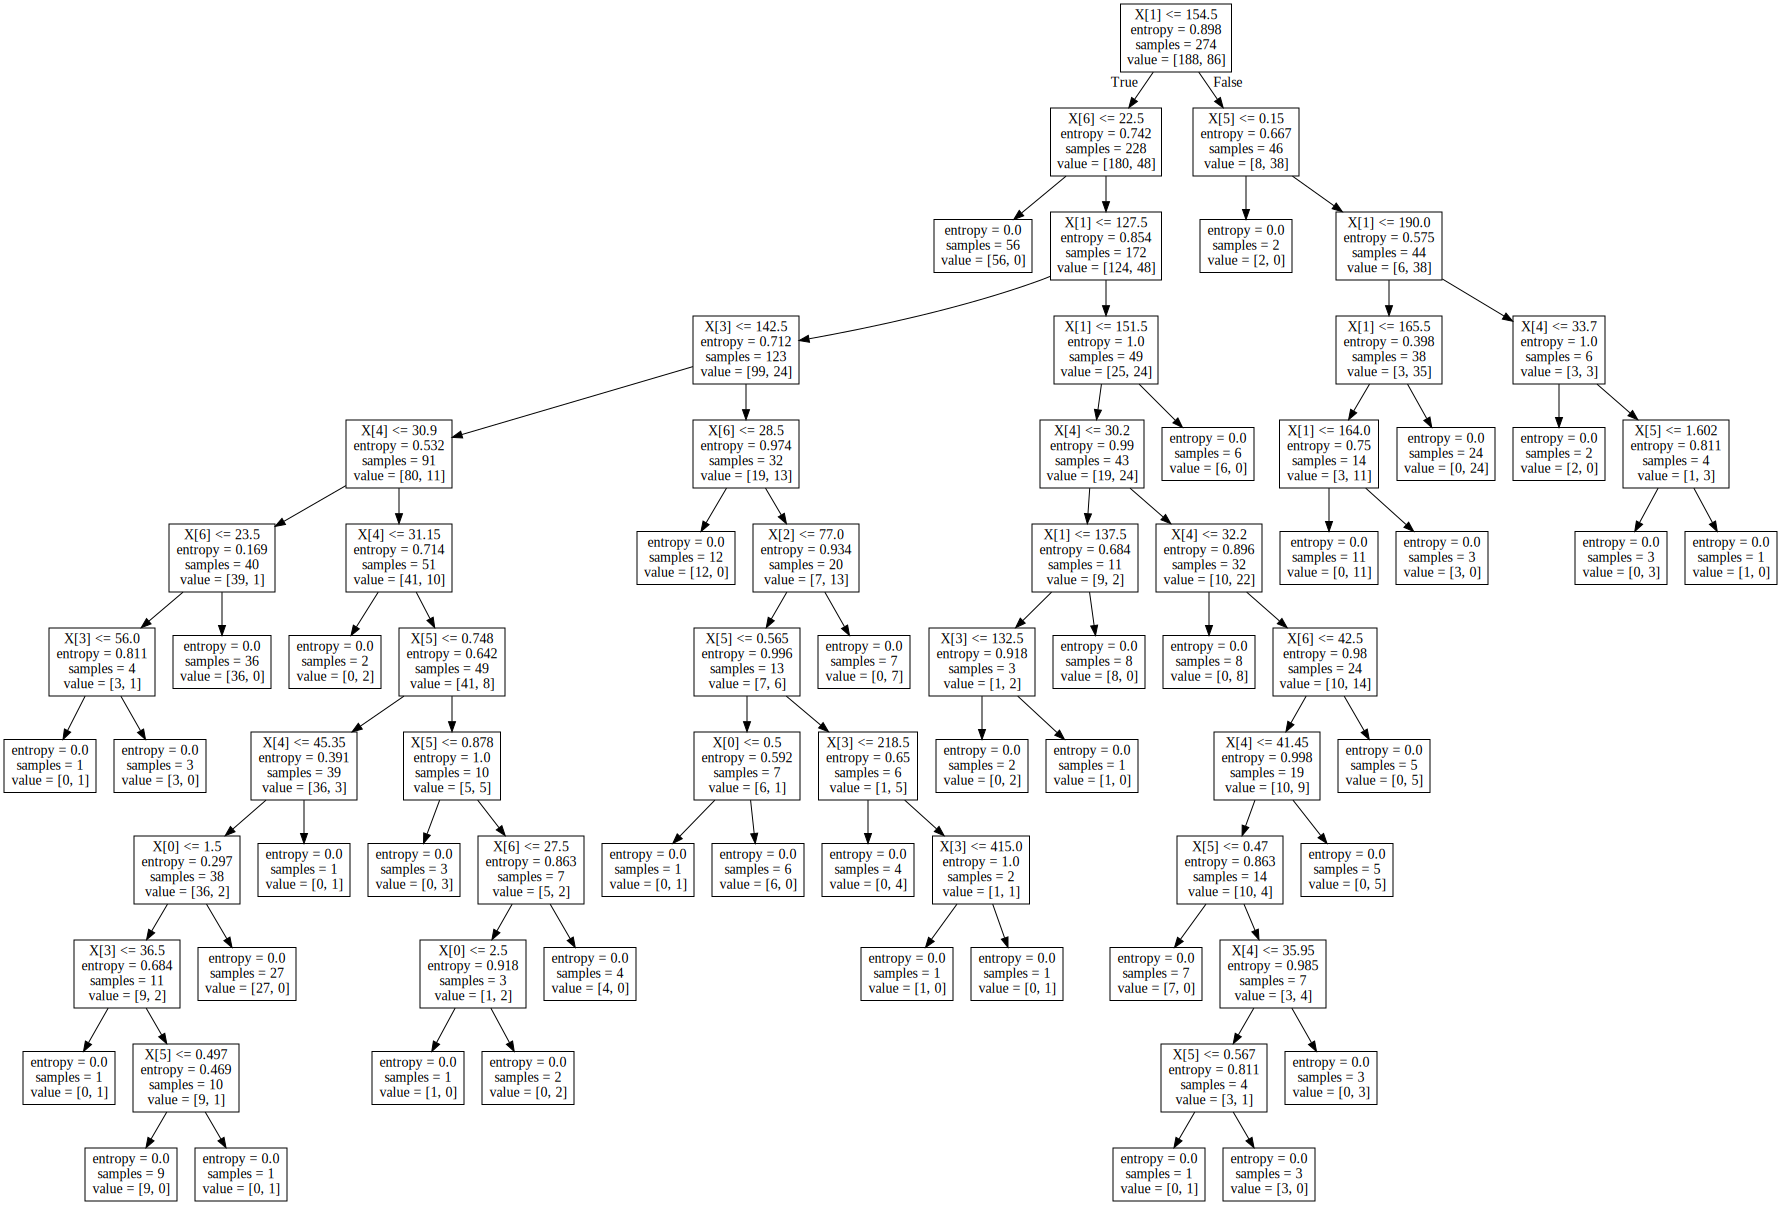

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz
import os

df = pd.read_csv("../../datasets/diabetes.csv")
df = df.drop('SkinThickness', 'columns')
df = df.dropna()

df = df[(df[['Glucose','BloodPressure','Insulin', 'BMI','DiabetesPedigreeFunction','Age']] != 0).all(axis=1)]

split_data = train_test_split(df, test_size=.30)

train_data = split_data[0]
test_data = split_data[1]

outcome_train = train_data.Outcome.tolist()
outcome_test = test_data.Outcome.tolist()

train_data_remove = train_data.drop(columns = "Outcome")
test_data_remove = test_data.drop(columns = "Outcome")

# ID3
clf = sklearn.tree.DecisionTreeClassifier(criterion = "entropy")
clf.fit(train_data_remove, outcome_train)

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Diabetes")

graph

In [2]:
test_array = clf.predict(test_data_remove).tolist()
ID3TestAccuracy = sklearn.metrics.accuracy_score(outcome_test, test_array)

print('ID3 Testing accuracy: ',ID3TestAccuracy)



ID3 Testing accuracy:  0.7372881355932204


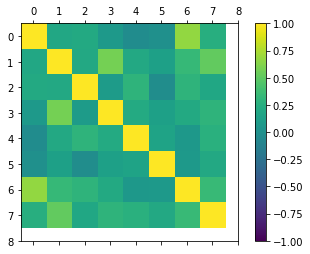

In [3]:
correlation = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

In [4]:
train_array = clf.predict(train_data_remove).tolist()
ID3TrainAccuracy = sklearn.metrics.accuracy_score(outcome_train, train_array)

print('ID3 Training accuracy: ',ID3TrainAccuracy)

ID3 Training accuracy:  1.0


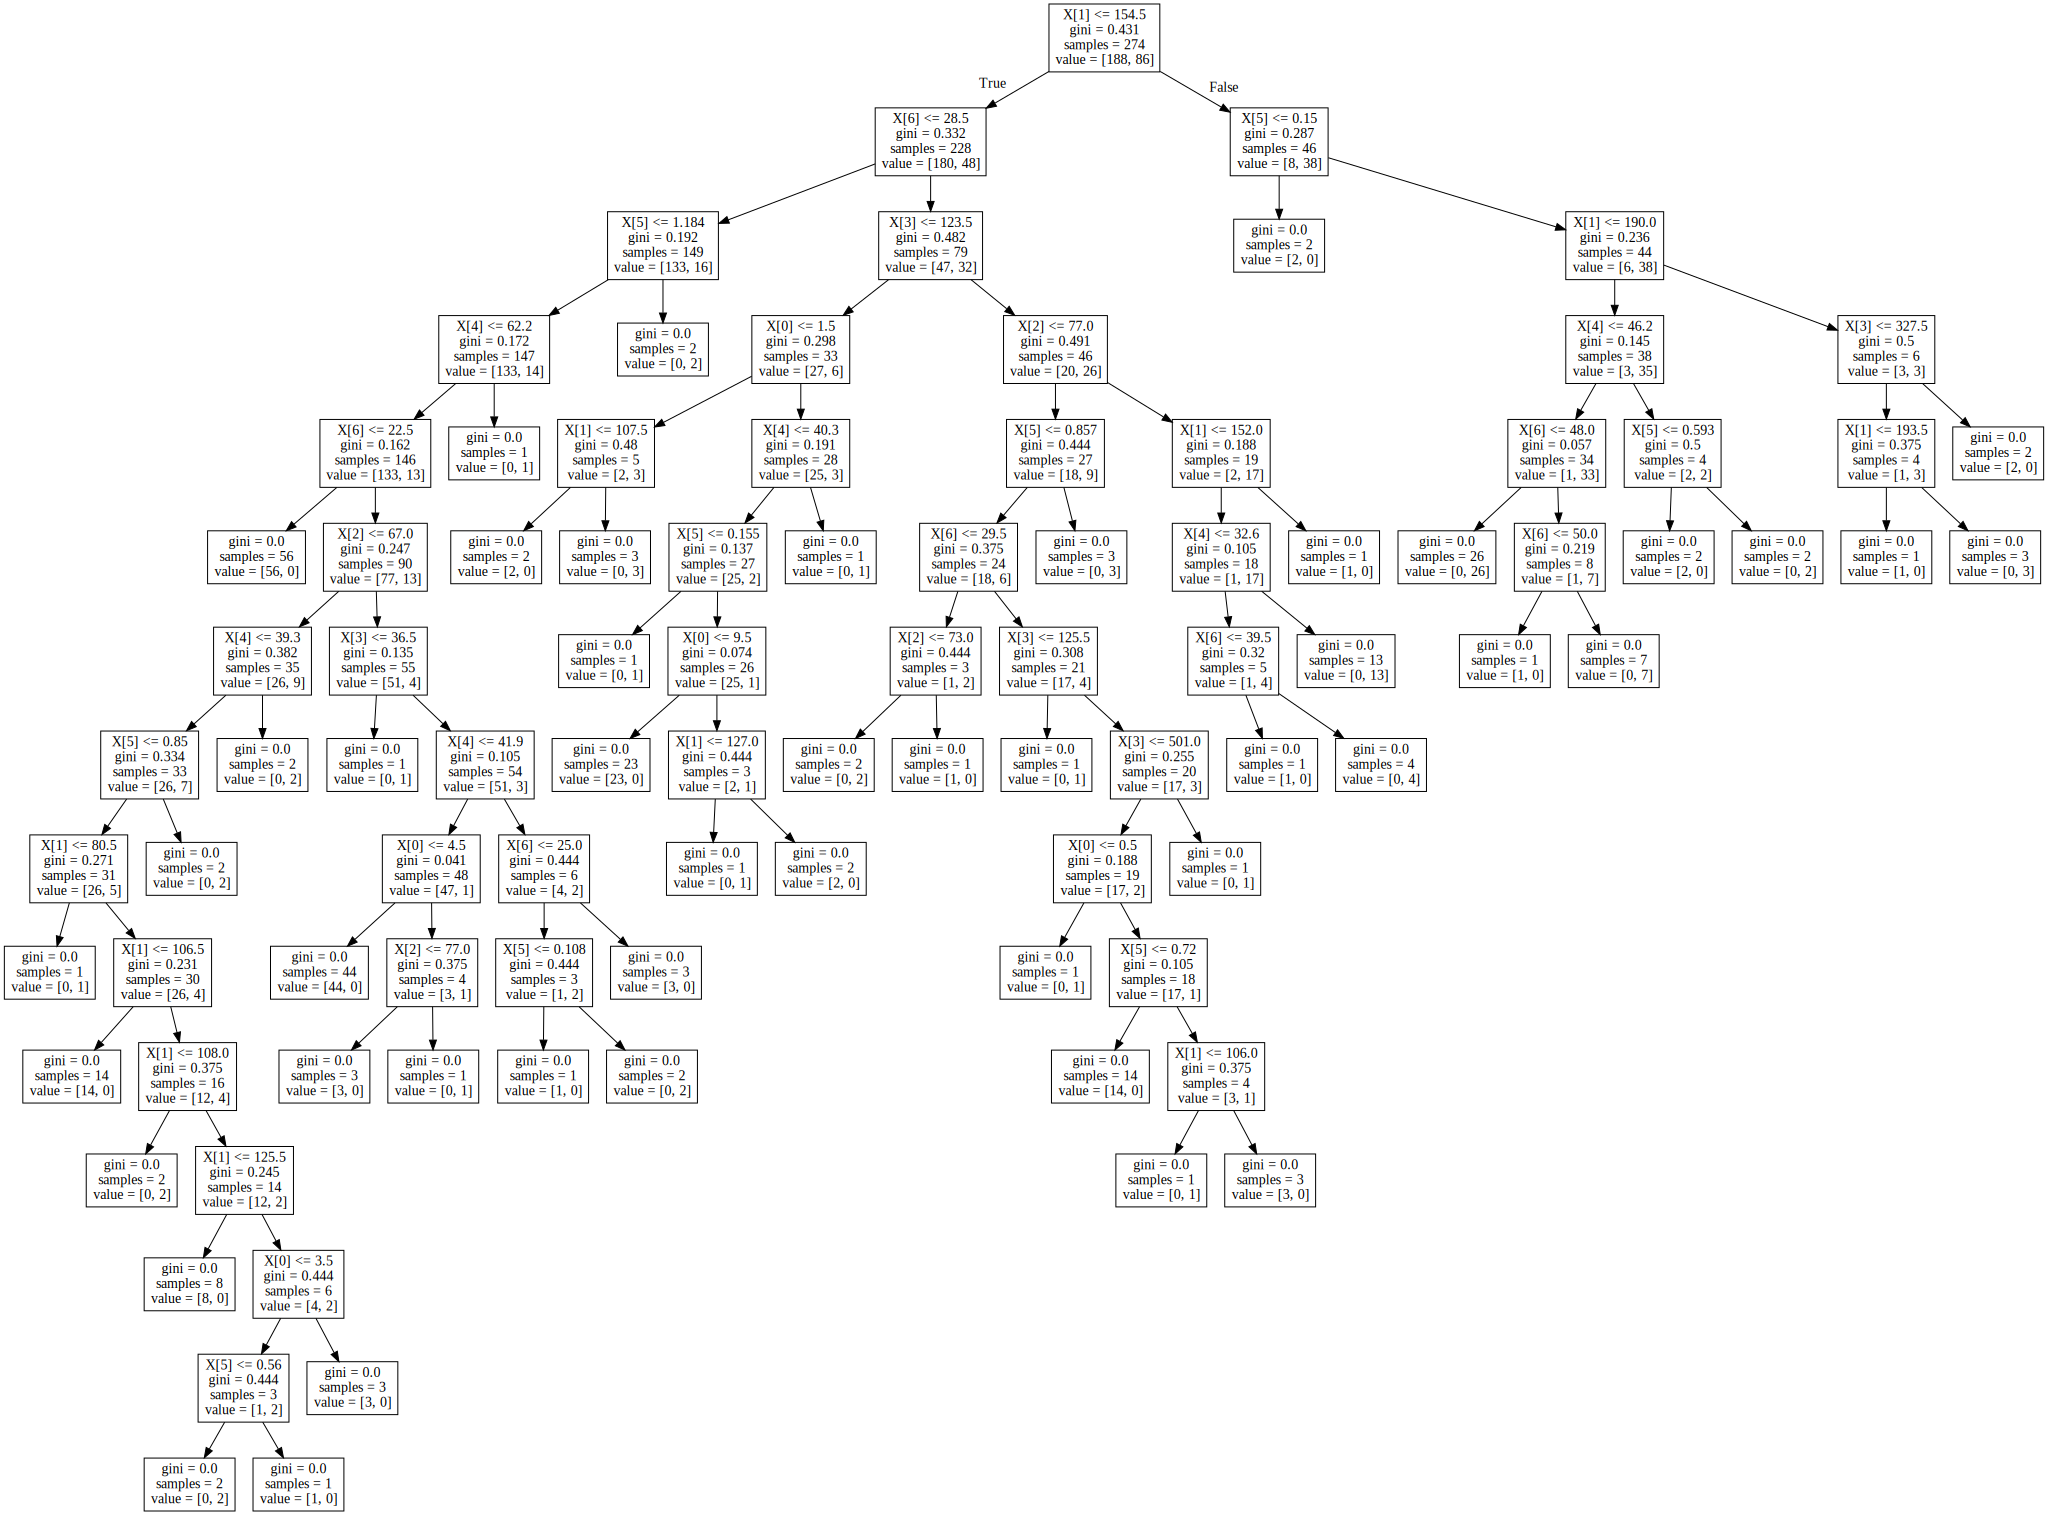

In [5]:
# C4.5
clf2 = sklearn.tree.DecisionTreeClassifier()

clf2.fit(train_data_remove, outcome_train)

dot_data = tree.export_graphviz(clf2, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Diabetes")

graph

In [6]:
test_array2 = clf2.predict(test_data_remove).tolist()
CTestAccuracy = sklearn.metrics.accuracy_score(outcome_test, test_array2)

print('C4.5 Testing accuracy: ',CTestAccuracy)


C4.5 Testing accuracy:  0.6949152542372882


In [7]:
train_array2 = clf2.predict(train_data_remove).tolist()

CTrainAccuracy = sklearn.metrics.accuracy_score(outcome_train, train_array2)

print('C4.5 Training accuracy: ', CTrainAccuracy)

C4.5 Training accuracy:  1.0


In [8]:
prediction_test = clf.predict(test_data_remove).tolist()
print("TESTING DATA")
print('Confusion Matrix with Testing Data with ID3 Algorithm:')
print(confusion_matrix(outcome_test, prediction_test))
print()
print('Classification Report ID3 Algorithm:')
print(classification_report(outcome_test, prediction_test))
print()
print()
print("TRAINING DATA")
prediction_train = clf.predict(train_data_remove).tolist()

print('Confusion Matrix with Training Data with ID3 Algorithm:')
print(confusion_matrix(outcome_train, prediction_train))
print()
print('Classification Report ID3 Algorithm:')
print(classification_report(outcome_train, prediction_train))

TESTING DATA
Confusion Matrix with Testing Data with ID3 Algorithm:
[[58 16]
 [15 29]]

Classification Report ID3 Algorithm:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79        74
           1       0.64      0.66      0.65        44

   micro avg       0.74      0.74      0.74       118
   macro avg       0.72      0.72      0.72       118
weighted avg       0.74      0.74      0.74       118



TRAINING DATA
Confusion Matrix with Training Data with ID3 Algorithm:
[[188   0]
 [  0  86]]

Classification Report ID3 Algorithm:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00        86

   micro avg       1.00      1.00      1.00       274
   macro avg       1.00      1.00      1.00       274
weighted avg       1.00      1.00      1.00       274



In [9]:
prediction_train2 = clf2.predict(train_data_remove).tolist()

print("TESTING DATA")
print('Confusion Matrix with Testing Data with C4.5 Algorithm: ')
print(confusion_matrix(outcome_train, prediction_train2))
print()
print('Classification Report C4.5 Algorithm:')
print(classification_report(outcome_train, prediction_train2))
print()
print()
print("TRAINING DATA")
print('Confusion Matrix with Training Data with C4.5 Algorithm:')
print(confusion_matrix(outcome_train, prediction_train2))
print()
print('Classification Report C4.5 Algorithm:')
print(classification_report(outcome_train, prediction_train2))


TESTING DATA
Confusion Matrix with Testing Data with C4.5 Algorithm: 
[[188   0]
 [  0  86]]

Classification Report C4.5 Algorithm:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00        86

   micro avg       1.00      1.00      1.00       274
   macro avg       1.00      1.00      1.00       274
weighted avg       1.00      1.00      1.00       274



TRAINING DATA
Confusion Matrix with Training Data with C4.5 Algorithm:
[[188   0]
 [  0  86]]

Classification Report C4.5 Algorithm:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00        86

   micro avg       1.00      1.00      1.00       274
   macro avg       1.00      1.00      1.00       274
weighted avg       1.00      1.00      1.00       274

